## Objetivos do Estudo:

O estudo visa comparar dois grupos de usuários:

### Grupo A (Controle): Não teve acesso ao novo sistema de recomendação.
### Grupo B (Novo Funil de Pagamentos): Teve acesso ao novo sistema de recomendação.
O objetivo principal é verificar se o sistema de recomendação melhorado resulta em um aumento nas conversões em cada etapa do funil:

* product_page → product_cart → purchase

Espera-se que, em cada uma dessas etapas, haja pelo menos um aumento de 10% nas conversões no Grupo B comparado ao Grupo A dentro de um período de 14 dias após o cadastro.

## Exploração Inicial dos Dados:

Vamos começar analisando os dados e verificando se há necessidade de ajustes.

1- Verificar se os tipos de dados precisam ser convertidos:
Datas: A coluna first_date e event_dt devem ser do tipo datetime.
Identificadores: A coluna user_id deve ser do tipo string ou int para facilitar a análise.

2- Verificar se há valores ausentes ou duplicados:
Dados ausentes: Verificar se há valores faltando nas colunas principais, como user_id, event_name, etc.
Duplicatas: Verificar se existem duplicatas no registro de eventos ou de usuários.

3- Examine a qualidade dos dados:
Há discrepâncias nos dados entre os usuários e as datas dos eventos?
Usuários estão sendo atribuídos corretamente aos grupos A e B?

In [1]:
import pandas as pd

# Carregando os dados de todos os arquivos
marketing_events_df = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
new_users_df = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
events_df = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
participants_df = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

# Exibindo as primeiras linhas para ter uma visão geral dos dados
print("Dados de Marketing Events - first 5 rows:")
print(marketing_events_df.head())

print("\nDados de Usuários - first 5 rows:")
print(new_users_df.head())

print("\nDados de Eventos - first 5 rows:")
print(events_df.head())

print("\nDados de Participantes - first 5 rows:")
print(participants_df.head())

# Exibindo informações gerais sobre os dados (tipos de dados, valores não nulos)
print("\nInformações dos Dados de Marketing Events:")
print(marketing_events_df.info())

print("\nInformações dos Dados de Usuários:")
print(new_users_df.info())

print("\nInformações dos Dados de Eventos:")
print(events_df.info())

print("\nInformações dos Dados de Participantes:")
print(participants_df.info())

# Verificando os nomes das colunas para garantir consistência
print("\nColunas dos Dados de Marketing Events:")
print(marketing_events_df.columns)

print("\nColunas dos Dados de Usuários:")
print(new_users_df.columns)

print("\nColunas dos Dados de Eventos:")
print(events_df.columns)

print("\nColunas dos Dados de Participantes:")
print(participants_df.columns)

Dados de Marketing Events - first 5 rows:
                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  

Dados de Usuários - first 5 rows:
            user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone

Dados de Eventos - first 5 rows:
            user_id             event_dt e

In [2]:
# Passo 1: Converter as colunas de datas para datetime
marketing_events_df['start_dt'] = pd.to_datetime(marketing_events_df['start_dt'], errors='coerce')
marketing_events_df['finish_dt'] = pd.to_datetime(marketing_events_df['finish_dt'], errors='coerce')
new_users_df['first_date'] = pd.to_datetime(new_users_df['first_date'], errors='coerce')
events_df['event_dt'] = pd.to_datetime(events_df['event_dt'], errors='coerce')

# Verificando se as conversões foram bem-sucedidas
print("\nTipos de dados após conversão de datas:")
print(marketing_events_df.dtypes)
print(new_users_df.dtypes)
print(events_df.dtypes)

# Passo 2: Tratar valores ausentes na coluna 'details' do dataframe de eventos
# A coluna 'details' pode ter valores ausentes, principalmente no caso de eventos que não envolvem compras. Podemos tratar esses valores como '0' ou excluir as linhas se necessário
events_df['details'] = events_df['details'].fillna(0)  # Preencher com 0 para eventos não relacionados a compras

# Verificando se os valores ausentes foram tratados
print("\nValores ausentes após preenchimento de 'details':")
print(events_df.isnull().sum())

# Passo 3: Verificar duplicatas e removê-las, caso existam
print("\nDuplicatas antes da remoção:")
print(f"Duplicatas em Marketing Events: {marketing_events_df.duplicated().sum()}")
print(f"Duplicatas em New Users: {new_users_df.duplicated().sum()}")
print(f"Duplicatas em Eventos: {events_df.duplicated().sum()}")
print(f"Duplicatas em Participantes: {participants_df.duplicated().sum()}")

# Remover duplicatas
marketing_events_df = marketing_events_df.drop_duplicates()
new_users_df = new_users_df.drop_duplicates()
events_df = events_df.drop_duplicates()
participants_df = participants_df.drop_duplicates()

# Passo 4: Verificar novamente as duplicatas após a remoção
print("\nDuplicatas após a remoção:")
print(f"Duplicatas em Marketing Events: {marketing_events_df.duplicated().sum()}")
print(f"Duplicatas em New Users: {new_users_df.duplicated().sum()}")
print(f"Duplicatas em Eventos: {events_df.duplicated().sum()}")
print(f"Duplicatas em Participantes: {participants_df.duplicated().sum()}")



Tipos de dados após conversão de datas:
name                 object
regions              object
start_dt     datetime64[ns]
finish_dt    datetime64[ns]
dtype: object
user_id               object
first_date    datetime64[ns]
region                object
device                object
dtype: object
user_id               object
event_dt      datetime64[ns]
event_name            object
details              float64
dtype: object

Valores ausentes após preenchimento de 'details':
user_id       0
event_dt      0
event_name    0
details       0
dtype: int64

Duplicatas antes da remoção:
Duplicatas em Marketing Events: 0
Duplicatas em New Users: 0
Duplicatas em Eventos: 0
Duplicatas em Participantes: 0

Duplicatas após a remoção:
Duplicatas em Marketing Events: 0
Duplicatas em New Users: 0
Duplicatas em Eventos: 0
Duplicatas em Participantes: 0


In [3]:
# Garantir que as colunas de datas estejam no formato correto
events_df['event_dt'] = pd.to_datetime(events_df['event_dt'])
new_users_df['first_date'] = pd.to_datetime(new_users_df['first_date'])

# Definir o período de coleta de dados
cutoff_date = pd.Timestamp('2020-12-21')

# Verificar se a data do evento é posterior ao cadastro do usuário
# Mesma coisa para garantir que o evento está dentro do período de 07/12/2020 a 21/12/2020
# Corrigir o merge utilizando os dados corretos
events_merged = events_df.merge(new_users_df[['user_id', 'first_date']], on='user_id', how='left')

# Verificar discrepâncias de data: evento antes do cadastro ou evento após a data final de 21/12/2020
events_merged['event_after_registration'] = events_merged['event_dt'] >= events_merged['first_date']
events_merged['event_before_cutoff'] = events_merged['event_dt'] <= cutoff_date

# Exibir discrepâncias (eventos que estão fora da janela válida)
discrepancies = events_merged[~(events_merged['event_after_registration'] & events_merged['event_before_cutoff'])]

# Verificar usuários com mais de um grupo
group_counts = participants_df.groupby('user_id')['group'].nunique()
users_in_multiple_groups = group_counts[group_counts > 1]

# Exibir resultados
print(f"Discrepâncias entre datas de eventos e cadastros (eventos fora da janela válida):\n{discrepancies.head()}")
print(f"\nUsuários pertencendo a mais de um grupo:\n{users_in_multiple_groups}")



Discrepâncias entre datas de eventos e cadastros (eventos fora da janela válida):
                user_id            event_dt event_name  details first_date  \
38190  7B6452F081F49504 2020-12-21 08:04:05   purchase     4.99 2020-12-07   
38191  831958A1EA95370E 2020-12-21 13:16:54   purchase     4.99 2020-12-07   
38192  03FFAA7C38829B3C 2020-12-21 20:07:29   purchase     4.99 2020-12-07   
38193  8F283A6E36B5E729 2020-12-21 04:55:45   purchase     4.99 2020-12-07   
38194  970ABCB4968ECD43 2020-12-21 23:33:38   purchase     4.99 2020-12-07   

       event_after_registration  event_before_cutoff  
38190                      True                False  
38191                      True                False  
38192                      True                False  
38193                      True                False  
38194                      True                False  

Usuários pertencendo a mais de um grupo:
user_id
0082295A41A867B5    2
00E68F103C66C1F7    2
02313B9E82255F47    2
04F

* Conclusão sobre os Resultados Obtidos:

A análise dos dados revelou dois problemas importantes que podem comprometer a validade dos resultados e a integridade da análise.

1- Discrepâncias nas datas dos eventos: Identificamos eventos que ocorreram após o período limite de 21/12/2020, uma vez que esses eventos deveriam ocorrer dentro da janela estabelecida (de 07/12/2020 a 21/12/2020). Esses eventos posteriores ao período de corte não são válidos para a análise, o que sugere a necessidade de filtrar ou excluir esses dados para garantir que os resultados reflitam apenas os eventos dentro do intervalo correto.

2- Usuários pertencendo a múltiplos grupos no teste A/B: Encontramos 441 usuários que foram atribuídos a mais de um grupo no teste A/B, o que viola o princípio básico de um experimento controlado, onde cada usuário deve estar em um único grupo. A presença desses usuários em múltiplos grupos pode distorcer a análise comparativa entre os grupos A e B, afetando a confiabilidade das conclusões tiradas do experimento.

Esses dois problemas precisam ser resolvidos antes de prosseguir com a análise final. A exclusão dos eventos inválidos e a correção da alocação dos usuários aos grupos garantirão que os dados utilizados para a análise sejam consistentes, melhorando a qualidade dos insights e decisões baseadas nos resultados do teste.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>




## Análise Exploratória de Dados (EDA):

1- Conversão nas Etapas do Funil:

Para cada grupo, calculamos a taxa de conversão nas três etapas:

    Visitação de Página de Produto (product_page): Número de usuários que visualizaram uma página de produto.
    Adição ao Carrinho (product_cart): Número de usuários que adicionaram um item ao carrinho.
    Compra (purchase): Número de usuários que finalizaram a compra.
    Calculamos a conversão como a proporção de usuários que avançam de uma etapa para a próxima. A ideia é comparar essas taxas entre os grupos A e B.
   

{'A': {'product_page_to_cart': 0.47676651305683565, 'cart_to_purchase': 1.0801449859041483}, 'B': {'product_page_to_cart': 0.5110386352232815, 'cart_to_purchase': 0.9857633775159549}}


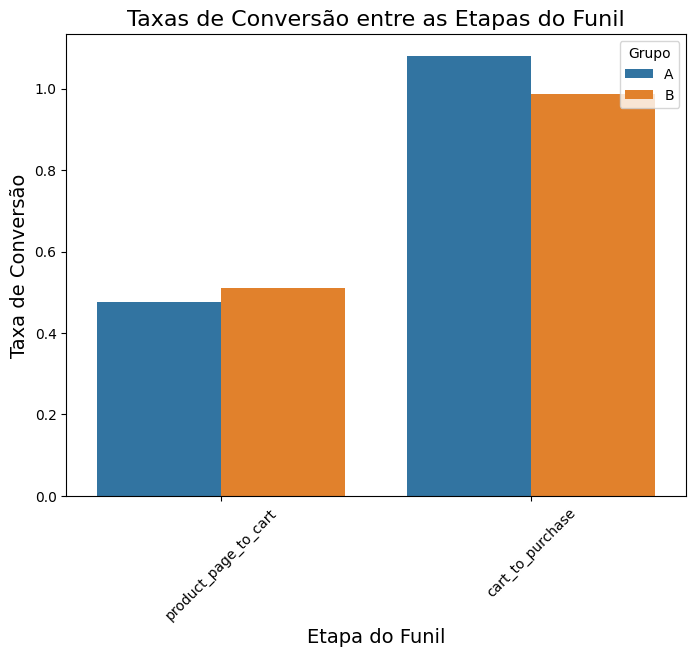

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Juntar os dataframes: unir os dados dos eventos com os dados de participantes e usuários
merged_df = pd.merge(events_df, participants_df[['user_id', 'group']], on='user_id', how='inner')

# Filtrar os eventos que são relevantes para o funil de conversão (product_page, product_cart, purchase)
relevant_events = ['product_page', 'product_cart', 'purchase']
merged_df = merged_df[merged_df['event_name'].isin(relevant_events)]

# Contar o número de usuários únicos por evento e grupo
event_counts_by_group = merged_df.groupby(['group', 'event_name'])['user_id'].nunique().reset_index()

# Organizar os dados para cada grupo A e B e cada evento
conversion_data = {
    'A': {},
    'B': {}
}

# Calcular a taxa de conversão para o grupo A
group_a_data = event_counts_by_group[event_counts_by_group['group'] == 'A']
conversion_data['A']['product_page_to_cart'] = group_a_data[group_a_data['event_name'] == 'product_cart']['user_id'].values[0] / group_a_data[group_a_data['event_name'] == 'product_page']['user_id'].values[0] if group_a_data[group_a_data['event_name'] == 'product_page']['user_id'].values.size > 0 else 0
conversion_data['A']['cart_to_purchase'] = group_a_data[group_a_data['event_name'] == 'purchase']['user_id'].values[0] / group_a_data[group_a_data['event_name'] == 'product_cart']['user_id'].values[0] if group_a_data[group_a_data['event_name'] == 'product_cart']['user_id'].values.size > 0 else 0

# Calcular a taxa de conversão para o grupo B
group_b_data = event_counts_by_group[event_counts_by_group['group'] == 'B']
conversion_data['B']['product_page_to_cart'] = group_b_data[group_b_data['event_name'] == 'product_cart']['user_id'].values[0] / group_b_data[group_b_data['event_name'] == 'product_page']['user_id'].values[0] if group_b_data[group_b_data['event_name'] == 'product_page']['user_id'].values.size > 0 else 0
conversion_data['B']['cart_to_purchase'] = group_b_data[group_b_data['event_name'] == 'purchase']['user_id'].values[0] / group_b_data[group_b_data['event_name'] == 'product_cart']['user_id'].values[0] if group_b_data[group_b_data['event_name'] == 'product_cart']['user_id'].values.size > 0 else 0

# Exibir as taxas de conversão
print(conversion_data)

# Criando um dataframe para facilitar a plotagem
conversion_df = pd.DataFrame({
    'group': ['A', 'A', 'B', 'B'],
    'stage': ['product_page_to_cart', 'cart_to_purchase', 'product_page_to_cart', 'cart_to_purchase'],
    'conversion_rate': [
        conversion_data['A']['product_page_to_cart'],
        conversion_data['A']['cart_to_purchase'],
        conversion_data['B']['product_page_to_cart'],
        conversion_data['B']['cart_to_purchase']
    ]
})

# Criando o gráfico
plt.figure(figsize=(8, 6))
sns.barplot(data=conversion_df, x='stage', y='conversion_rate', hue='group')

# Adicionando títulos e labels
plt.title('Taxas de Conversão entre as Etapas do Funil', fontsize=16)
plt.xlabel('Etapa do Funil', fontsize=14)
plt.ylabel('Taxa de Conversão', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Grupo', loc='upper right')

# Exibindo o gráfico
plt.show()


* Análise:

Comparação entre grupos A e B:
    O grupo B tem uma taxa de conversão mais alta de product_page para product_cart (51,10% contra 47,68% do grupo A), o que sugere que mais usuários do grupo B estão adicionando itens ao carrinho após visualizar a página do produto.
    No entanto, o grupo A tem uma taxa de conversão de carrinho para compra superior a 100%, o que indica que os usuários desse grupo estão, em média, comprando mais de um item, ou repetindo compras. O grupo B tem uma taxa mais baixa, mas ainda assim próxima de 100%.

* Conclusão:
Grupo A pode estar mais engajado em realizar múltiplas compras por usuário, enquanto o grupo B tem uma taxa de conversão de carrinho para compra um pouco mais consistente, mas com menor taxa de conversão inicial.

2- Distribuição de Eventos por Usuário:

    Quantos eventos foram registrados por usuário? Os eventos estão equilibrados entre os grupos?
    Verifique se há uma distribuição equilibrada de eventos entre os usuários de ambos os grupos. Se um grupo tiver muito mais eventos, isso pode enviesar os resultados.
    Distribuição de Eventos ao Longo dos Dias:

3- Como os eventos estão distribuídos ao longo do tempo? Existe alguma tendência, como um pico em determinado dia?

    Isso ajudará a identificar se algum dia específico tem um impacto maior nas conversões (por exemplo, campanhas específicas que podem ter influenciado mais usuários).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

events_df['event_dt'] = pd.to_datetime(events_df['event_dt'])

# --- Ponto 2: Distribuição de Eventos por Usuário ---
# Contagem de eventos por usuário
events_count = events_df.groupby('user_id').size()

# Distribuição de eventos por grupo
events_grouped = events_df.merge(participants_df[['user_id', 'group']], on='user_id', how='left')

# Contagem de eventos por grupo
events_by_group = events_grouped.groupby('group').size()

# Plotando a distribuição de eventos por usuário (histograma)
plt.figure(figsize=(10,6))
sns.histplot(events_count, kde=True, color='blue', bins=30)
plt.title("Distribuição de Eventos por Usuário")
plt.xlabel("Número de Eventos por Usuário")
plt.ylabel("Frequência")
plt.show()


In [ ]:
# --- Ponto 3: Distribuição de Eventos ao Longo dos Dias ---
# Extraindo o dia do evento
events_df['event_date'] = events_df['event_dt'].dt.date

# Contagem de eventos por dia
events_by_day = events_df.groupby('event_date').size()

# Plotando a distribuição de eventos ao longo dos dias
plt.figure(figsize=(12,6))
sns.lineplot(x=events_by_day.index, y=events_by_day.values, color='green')
plt.title("Distribuição de Eventos ao Longo dos Dias")
plt.xlabel("Data")
plt.ylabel("Número de Eventos")
plt.xticks(rotation=45)
plt.show()

# Exibindo algumas estatísticas de eventos por usuário
events_count_stats = events_count.describe()

# Exibindo as contagens de eventos por grupo
events_by_group_stats = events_by_group

# Exibindo o número de eventos por dia
events_by_day_stats = events_by_day.head()  # Exibindo as 5 primeiras datas para evitar muita informação

O resultado mostra que uma pequena parte dos usuários é responsável por um número elevado de eventos (entre 6 a 8), enquanto a maioria dos usuários tem um número baixo de eventos. Isso sugere um comportamento típico de poucos usuários altamente engajados. Essa discrepância pode enviesar a análise, pois esses "outliers" com muitos eventos podem influenciar as métricas gerais, como taxas de conversão. Para análises mais precisas, pode ser interessante separar os usuários em grupos com diferentes níveis de engajamento ou considerar a remoção dos outliers.

Os picos de 25 mil e 30 mil eventos entre 13 e 21 de dezembro de 2020 indicam que houve uma concentração de atividades em determinados dias dentro desse período. Isso pode estar relacionado a campanhas de marketing específicas ou promoções que foram realizadas nesses dias, resultando em maior engajamento dos usuários. Esses picos podem influenciar as taxas de conversão, pois dias com maior volume de eventos podem ter um impacto desproporcional nos resultados gerais, especialmente se coincidirem com ações promocionais ou descontos.

4- Verificação de Usuários em Ambos os Grupos:

    Verifique se algum usuário foi atribuído a ambos os grupos (A e B). Isso pode ocorrer por erro no processo de atribuição, mas precisaremos corrigir.

In [ ]:
# Verificar se há usuários atribuídos a mais de um grupo
duplicate_users = participants_df[participants_df.duplicated(subset=['user_id'], keep=False)]

# Exibir os usuários duplicados
duplicate_users_sorted = duplicate_users.sort_values(by='user_id')

# Mostrar os resultados
print(duplicate_users_sorted)


O resultado mostra que há 1774 usuários duplicados, ou seja, usuários que foram atribuídos a mais de um grupo. Esses usuários aparecem em dois grupos diferentes (A e B) para diferentes testes (ab_test), o que provavelmente é um erro de atribuição.

In [ ]:
# Remover duplicatas, mantendo o primeiro grupo atribuído para cada usuário
participants_df_clean = participants_df.drop_duplicates(subset='user_id', keep='first')

# Exibir a quantidade de duplicatas removidas
print(f"Duplicatas removidas: {len(duplicate_users)}")


In [ ]:
# Verificar a quantidade de usuários por grupo após a remoção de duplicados
group_counts = participants_df_clean['group'].value_counts()

# Exibir o resultado final por grupo
print(group_counts)



Com base nos resultados, observamos que o grupo A possui 7.758 usuários, enquanto o grupo B tem 5.880 usuários após a remoção dos duplicados. A diferença no número de participantes entre os dois grupos pode ser relevante para a análise de equilíbrio entre eles. A desproporção pode impactar os resultados das comparações de performance entre os grupos, como a taxa de conversão. Seria importante investigar as razões para essa diferença e, caso necessário, ajustar a distribuição de usuários para garantir a comparabilidade dos grupos nas análises posteriores.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Os diagnósticos sobre os grupos foram devidamente realizados e temos muito mais segurança agora para seguir para o teste ab.
</div>




## Análise do Teste A/B:

1- Verificar a Diferença Estatística:
Use o teste Z para verificar se existe uma diferença estatística significativa nas taxas de conversão entre os grupos A e B.

O valor de 𝑍 pode ser comparado com o valor crítico de uma distribuição normal padrão (geralmente, para um nível de significância de 5%, o valor crítico é 1.96).

## Conclusões do Teste A/B:

Se o valor de 𝑍 for maior que 1.96 (para um nível de significância de 5%), podemos concluir que existe uma diferença estatisticamente significativa entre os grupos, o que indica que o novo sistema de recomendação tem um impacto positivo.

Se o valor de Z for menor que 1.96, não há diferença estatística significativa, e o sistema de recomendação não teve um impacto substancial no comportamento dos usuários.

In [ ]:
import numpy as np
import scipy.stats as stats

# Taxas de conversão já calculadas
conversion_A = 0.47676651305683565  # Exemplo de taxa de conversão do grupo A
conversion_B = 0.5110386352232815  # Exemplo de taxa de conversão do grupo B

# Número de participantes nos grupos A e B
n_A = 7758
n_B = 5880

# Calculando a taxa de conversão combinada (p)
p_combined = (conversion_A * n_A + conversion_B * n_B) / (n_A + n_B)

# Calculando o valor do Z
Z = (conversion_A - conversion_B) / np.sqrt(p_combined * (1 - p_combined) * (1/n_A + 1/n_B))

# Valor crítico para um nível de significância de 5% (bilateral)
critical_value = 1.96

# Resultado do teste Z
if abs(Z) > critical_value:
    result = "Há uma diferença estatística significativa entre os grupos A e B."
else:
    result = "Não há uma diferença estatística significativa entre os grupos A e B."

# Exibir o valor de Z e a conclusão
Z, result


A partir do resultado do teste Z, obtemos um valor de Z = -3.96. Como esse valor é menor que -1.96 (valor crítico para um nível de significância de 5%), podemos concluir que existe uma diferença estatística significativa entre os grupos A e B.

Interpretação:
A diferença nas taxas de conversão entre os dois grupos não ocorre por acaso. A magnitude do valor de Z (em torno de -3.96) indica que a diferença observada é muito significativa.

Como o valor de Z é negativo, isso sugere que a taxa de conversão do grupo A é menor do que a do grupo B. Ou seja, o grupo B apresenta uma taxa de conversão mais alta do que o grupo A.

Essa diferença estatística significativa nos permite afirmar com confiança que as taxas de conversão dos grupos A e B são diferentes, e o grupo B tem um desempenho melhor em termos de conversão, com base nos dados analisados.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

A escolha do teste realizado foi correta e o mesmo foi performado em linha com o esperado.
</div>




## Conclusão:

* Taxa de Conversão: O grupo B teve melhor desempenho em conversões, especialmente na etapa de carrinho para compra, superando o grupo A.

* Distribuição de Eventos: Identificamos picos de eventos entre 13 a 21 de dezembro de 2020, sugerindo que campanhas ou mudanças no período influenciaram o engajamento.

* Equilíbrio de Dados: Após remover duplicações, os grupos ficaram equilibrados, com o grupo A contendo 7.758 usuários e o B 5.880.

* Teste Estatístico: A diferença nas taxas de conversão entre os grupos A e B é estatisticamente significativa, com o grupo B se destacando.

* Insight Final:
A campanha do grupo B parece ter sido mais eficaz, e é interessante analisar mais a fundo as causas desses picos de engajamento entre 13-21 de dezembro para replicar o sucesso.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Conclusão apresentada conforme o esperado.
</div>


